---

# Introduction

In this homework you will:

* Recall your skills of data analysis and preprocessing.
* Explore the behaviour of different machine learning models.
* Try to solve a regression type problem and interpret the results.

But first of all, a few notes:

* Check the first homework for a quick reminder on general rules.
* We do not expect you to make a model that makes necessarly good predictions, rather than explain why do you get the results which you get.
* We reserve the right to lower the grade for messy code, so keep it clean and make comments about what you do!
* Remember to submit the feedback! Especially if the homework was too difficult or easy for you.

This time, you will do the coding part yourself. That means, you take decisions about EDA, data cleaning, hyperparameters choice, etc. on your own (for the most part, at least).

Enjoy it while I rest!  \ (•◡•) /

Another important mention: your work must be reproducible.
It means that it would be possible to run your code and obtain the same results by pressing "Run All" button in settings of this notebook. To do so, don't forget to fix the random seed number where possible!

# Dataset

Today your task will be to understand the relationship between the cholesterol level and its associated factors, such as gender, age, BMI, medical condition and some genomic features. This can be explored by a regression analysis using machine learning methods that we learned in the class.

Description of the variables:

* DM: diabetes mellitus: 0 = no diabetes, 1 = diabetes
* age: Age in years
* chol: Serum total cholesterol, mg/dl
* BMI: Body-mass index, kg/m2
* TG: Serum triglycerides, mg/dl
* APOE: Apolipoprotein E genotype, with six genotypes coded 1-6: 1 = e2/e2, 2 = e2/e3, 3 = e2/e4, 4 = e3/e3, 5 = e3/e4, 6 = e4/e4
* rs174548: Candidate SNP 1 genotype, chromosome 11, physical position 61,803,876
. Coded as the number of minor alleles: 0 = C/C, 1 = C/G, 2 = G/G.
* rs4775041: Candidate SNP 2 genotype, chromosome 15, physical position 58,382,496. Coded as the number of minor alleles: 0 = C/C, 1 = C/G, 2 = G/G.
* HTN: diagnosed hypertension: 0 = no, 1 = yes
* chd: diagnosis of coronary heart disease: 0 = no, 1 = yes

Target variable: Serum total cholesterol

# Tasks [8.0]

### Exploratory Data Analysis [2.5]

[0.1] Before the analysis itself, don't forget to check the features you are working with. Some of them are not very obvious. Google some information on what those features represent, and write it down here:

* TG - Thyroglobulin, a glycoprotein homodimer produced predominantly by the thryroid gland. It acts as a substrate for the synthesis of thyroxine and triiodothyronine as well as the storage of the inactive forms of thyroid hormone and iodine. Thyroglobulin is secreted from the endoplasmic reticulum to its site of iodination, and subsequent thyroxine biosynthesis, in the follicular lumen. Mutations in this gene cause thyroid dyshormonogenesis, manifested as goiter, and are associated with moderate to severe congenital hypothyroidism. Polymorphisms in this gene are associated with susceptibility to autoimmune thyroid diseases  such as Graves disease and Hashimoto thryoiditis.
* APOE - Apolipoprotein E, a significant interaction between diabetes and APOE genotype exists, where diabetes affected cognitive decline in APOE3 carriers and APOE2 carriers, but not APOE4 carriers. Moreover, the presence of vascular pathology was increased by diabetes in APOE3 carriers, while APOE4 carriers nearly reached plateau levels irrespective of diabetes
* rs174548 - associated with altered lipid metabolism, including the levels of various lipids in the blood, such as cholesterol. Different alleles (variants) of rs174548 have been found to have different effects on lipid metabolism.

* rs4775041 - associated with cholesterol levels, particularly with LDL cholesterol.

You can (and should!) use this information when interpreting results.

Download the data:

In [ ]:
!gdown 1PrtyKo4e_q7jm7lR27CL7VbWVC8vZoWP

Downloading...
From: https://drive.google.com/uc?id=1PrtyKo4e_q7jm7lR27CL7VbWVC8vZoWP
To: /content/Data-Cholesterol-V2.csv
100% 11.4k/11.4k [00:00<00:00, 19.7MB/s]


In [ ]:
!ls

Data-Cholesterol-V2.csv  sample_data


In [ ]:
import pandas as pd
df = pd.read_csv('Data-Cholesterol-V2.csv')
df.head(3)

,DM,age,chol,BMI,TG,APOE,rs174548,rs4775041,HTN,chd
0,1,74,215,26.2,367,4,1,2,1,1
1,1,51,204,24.7,150,4,2,1,1,1
2,0,64,205,24.2,213,4,0,1,1,0


[0.5] Know your data, make relevant data analysis and explain:
 * What types of variables there are - numeric and categorical
 * Your strategy about NaN values, if any present - im goint to replace them with mean as the dataset is small
 * Your strategy about categorical columns, if any present - there are categorical colums - 'DM', 'APOE', 'rs174548', 'rs4775041', 'HTN', 'chd' - im going to apply OHE to them

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DM         400 non-null    int64  
 1   age        400 non-null    int64  
 2   chol       400 non-null    int64  
 3   BMI        363 non-null    float64
 4   TG         400 non-null    int64  
 5   APOE       400 non-null    int64  
 6   rs174548   400 non-null    int64  
 7   rs4775041  400 non-null    int64  
 8   HTN        400 non-null    int64  
 9   chd        400 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 31.4 KB


In [ ]:
df.isna().sum() # пустые данные только в BMI

DM            0
age           0
chol          0
BMI          37
TG            0
APOE          0
rs174548      0
rs4775041     0
HTN           0
chd           0
dtype: int64

In [ ]:
print(f"Total NA values: {df.isna().sum().sum()}")

Total NA values: 37


In [ ]:
# since the dataset is small we wont drop na
df.loc[df['BMI'].isna(), 'BMI'] = df['BMI'].mean()

In [ ]:
# making sure we dropped all na
assert df.isna().sum().sum() == 0, "there shouldn't be NA values (-_-)..."

In [ ]:
# making sure there are no duplicated rows
assert len(df[df.duplicated()]) == 0, "its better to keep unique rows (-_-)..."

Assuming your data is now certainly clean, you can start looking at the features.

[0.5] Make relevant visualization of features(histograms, boxplots, etc.) and analyze it.

In [ ]:
categorical = ['DM', 'APOE', 'rs174548', 'rs4775041', 'HTN', 'chd']
_vars = [x for x in list(df.columns) if x not in categorical]
_vars

['age', 'chol', 'BMI', 'TG']

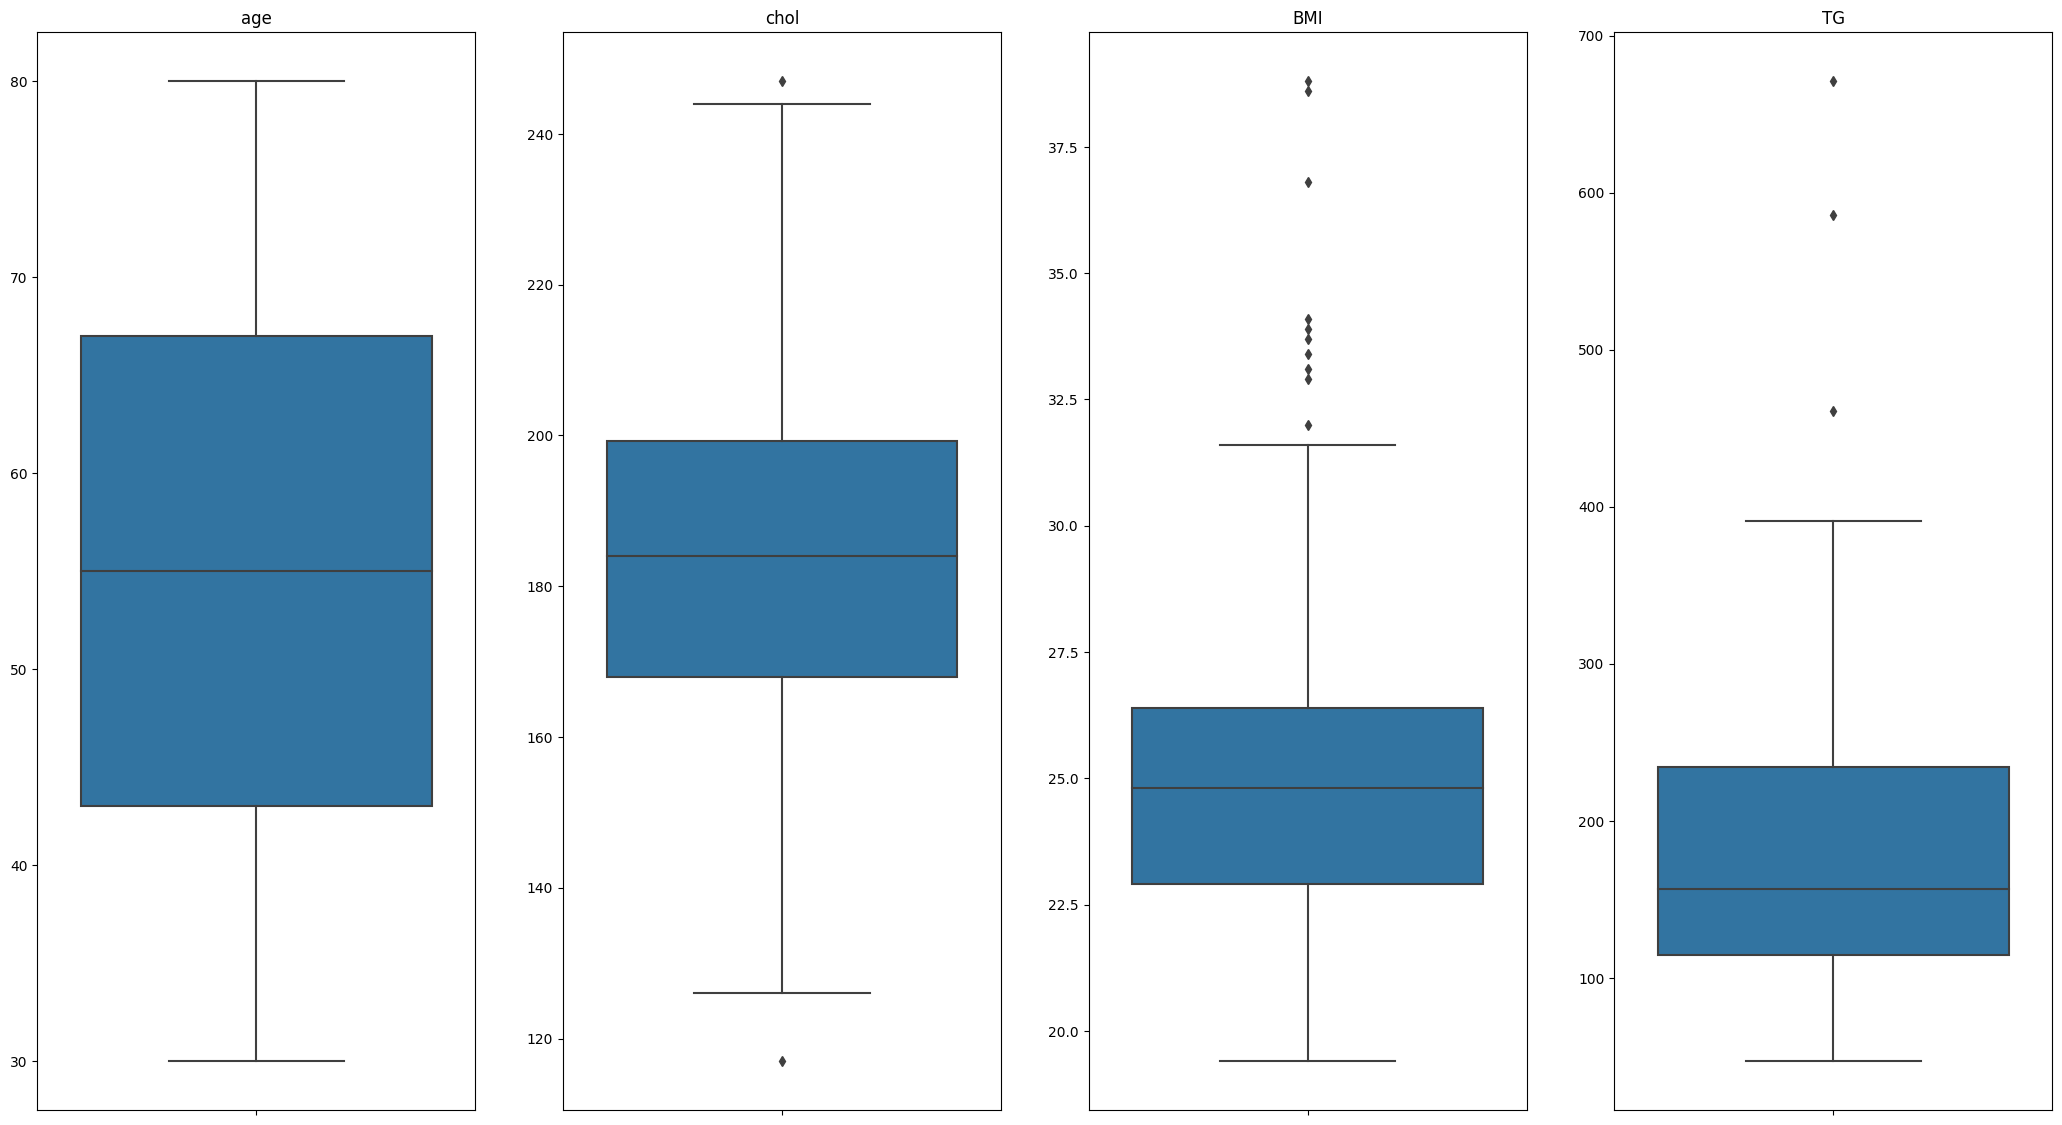

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create figure with 20 subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(26, 14))
# By default, axes is a 4x5 matrix, ravel it to a flat array with 20 elements
axes = axes.ravel()


# Plot boxplot for each numeric column
for col, ax in zip(_vars, axes):
  sns.boxplot(y = df[col], ax=ax)
  #sns.violinplot(y = df[col], ax=ax)
  ax.set_title(col)
  ax.set(xlabel='', ylabel='')

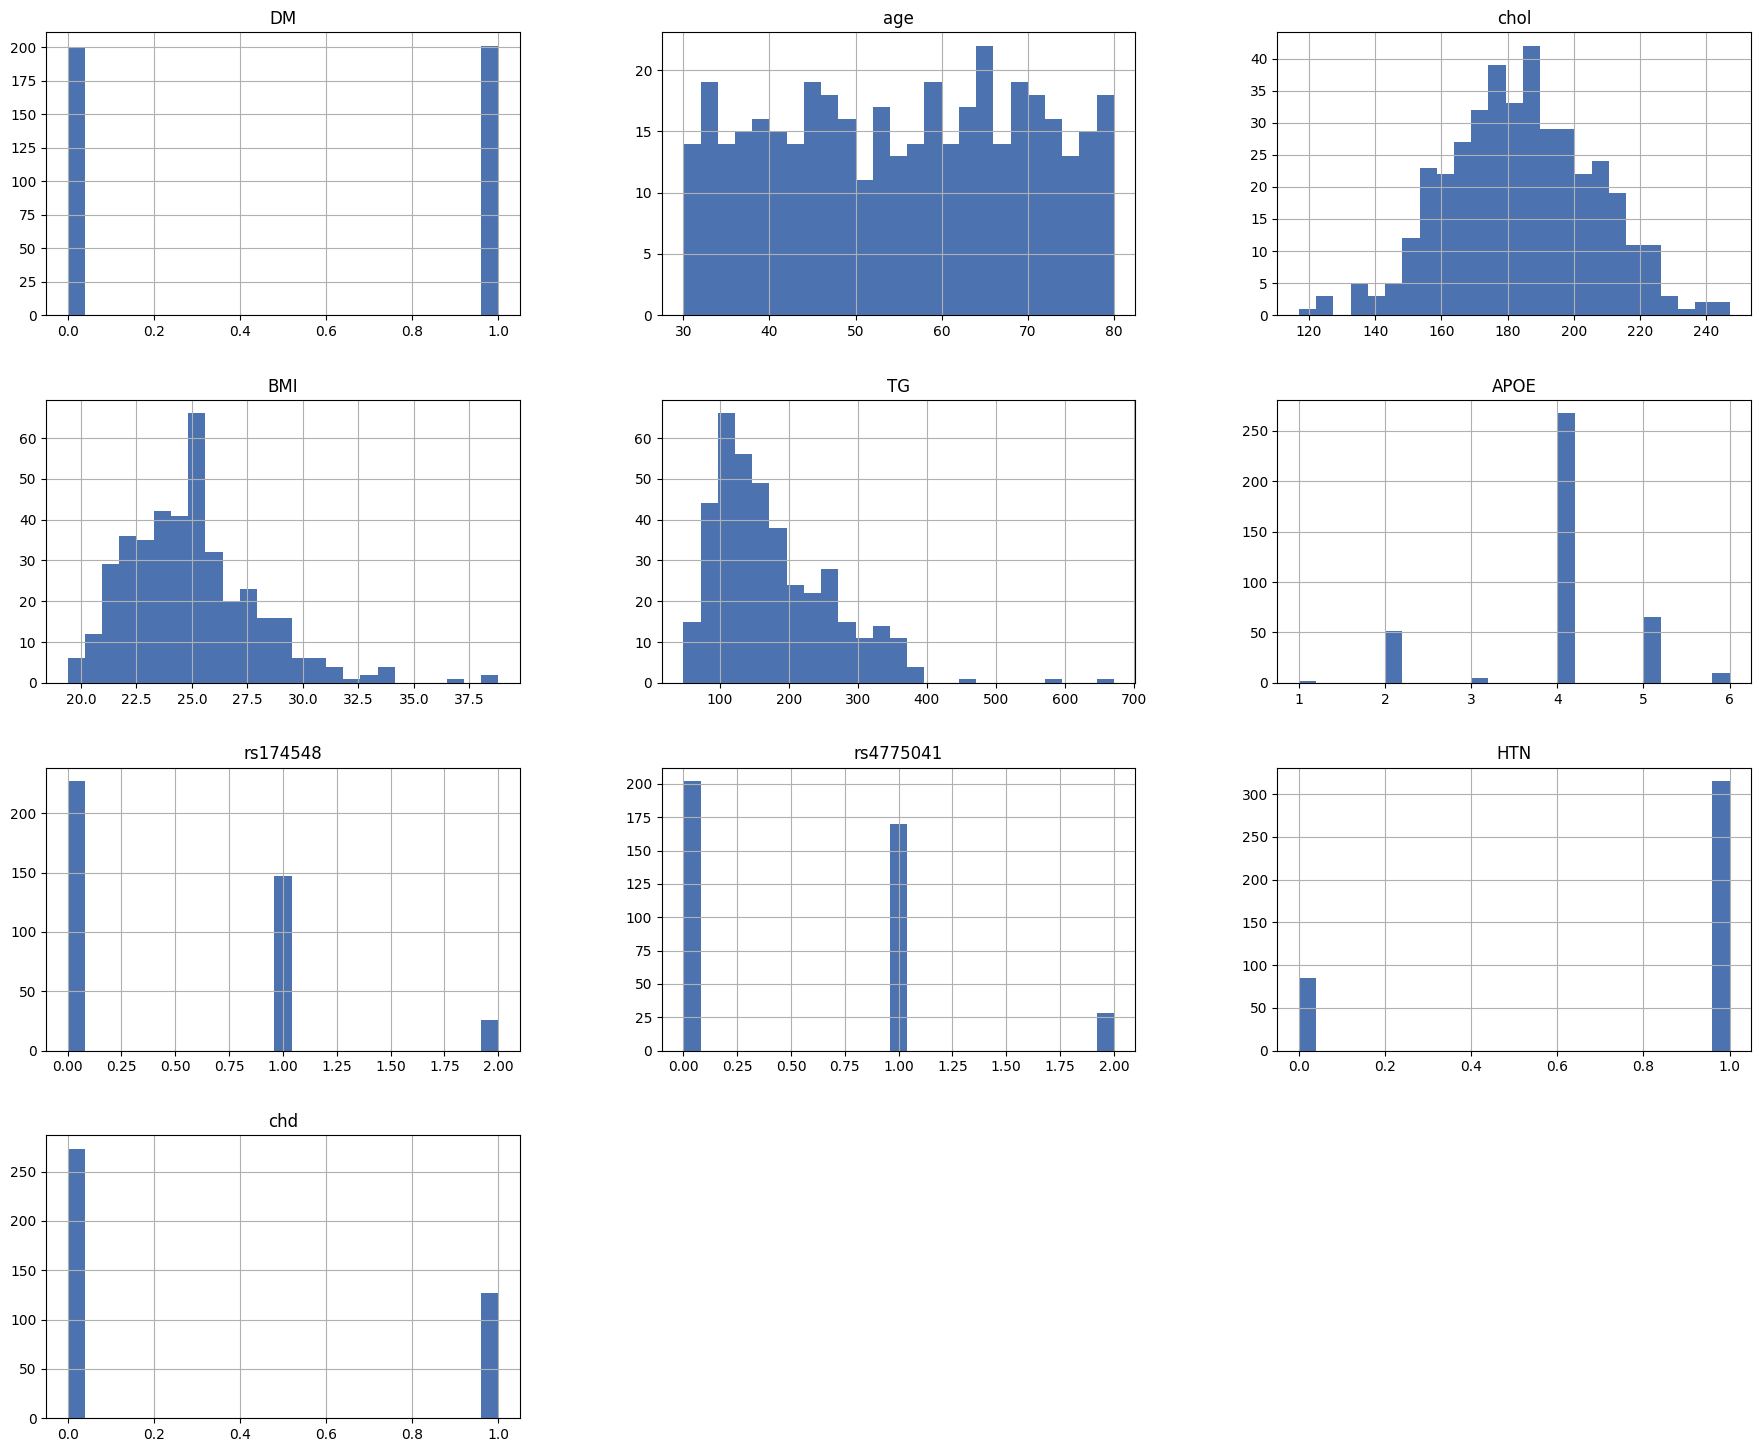

In [ ]:
import matplotlib as plt
plt.style.use("seaborn-v0_8-deep")
_ = df.hist(figsize=(22, 18), bins=25)

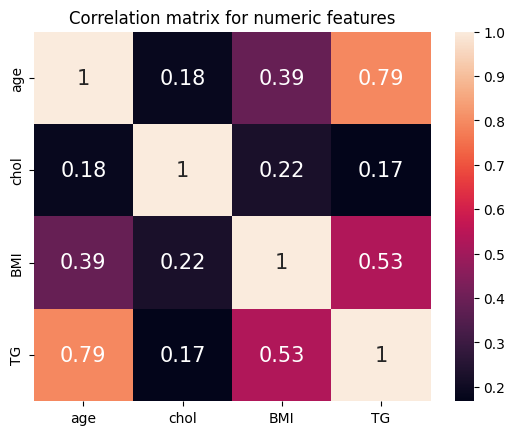

In [ ]:
import seaborn as sns

corr = df[_vars].corr('spearman')
_ = sns.heatmap(corr, annot= True, annot_kws={"size": 15}).set(title='Correlation matrix for numeric features')

In [ ]:
_vars.remove('chol')
_vars

['age', 'BMI', 'TG']

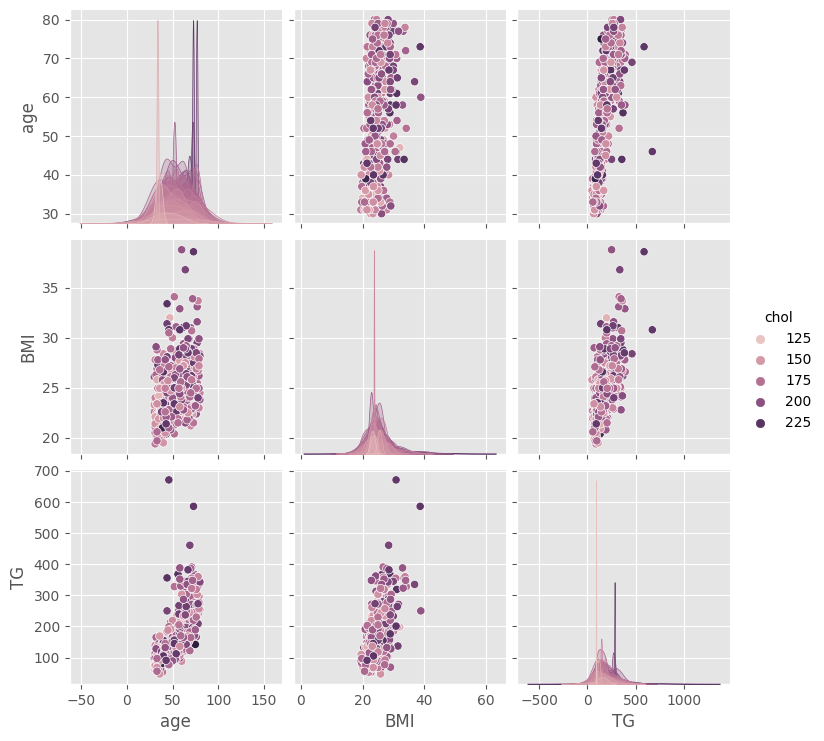

In [ ]:
plt.style.use("ggplot")
_ = sns.pairplot(df, vars = _vars, hue='chol')

[0.5] Is there anything strange about any of the features? If yes, what can be done?

**general features of the given dataset:**
- small dataset
- unbalanced data: HTN, APOE,
- outliers in BMI & TG

In [ ]:
# first of all, lets deal with the outliers in bmi (can be seen from the boxplot)
df['BMI'].describe()

count    400.000000
mean      24.954821
std        2.971957
min       19.400000
25%       22.900000
50%       24.800000
75%       26.400000
max       38.800000
Name: BMI, dtype: float64

In [ ]:
df['TG'].describe()

count    400.000000
mean     178.687500
std       86.574319
min       47.000000
25%      114.750000
50%      156.500000
75%      234.500000
max      671.000000
Name: TG, dtype: float64

removing BMI outliers

In [ ]:
# used https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

import numpy as np
def removeOutlier(colName):
  # calculate interquartile range
  q25, q75 = np.percentile(df[f'{colName}'], 25), np.percentile(df[f'{colName}'], 75)
  iqr = q75 - q25

  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  lower, upper = q25 - cut_off, q75 + cut_off

  # identify outliers
  outliers = [x for x in df[f'{colName}'] if x < lower or x > upper]
  return outliers # results correspond to the graph

In [ ]:
outliers = removeOutlier('BMI')
outliers

[34.1, 32.0, 33.4, 36.8, 38.8, 32.9, 38.6, 33.1, 33.7, 33.9]

In [ ]:
len(df)

400

In [ ]:
# dropping rows with outliers (as there are not so many of them its safer to drop such data)
df = df[~df.BMI.isin(outliers)]
len(df)

390

In [ ]:
outliers = removeOutlier('TG')
outliers

[461, 671]

In [ ]:
df = df[~df.TG.isin(outliers)]

In [ ]:
len(df)

388

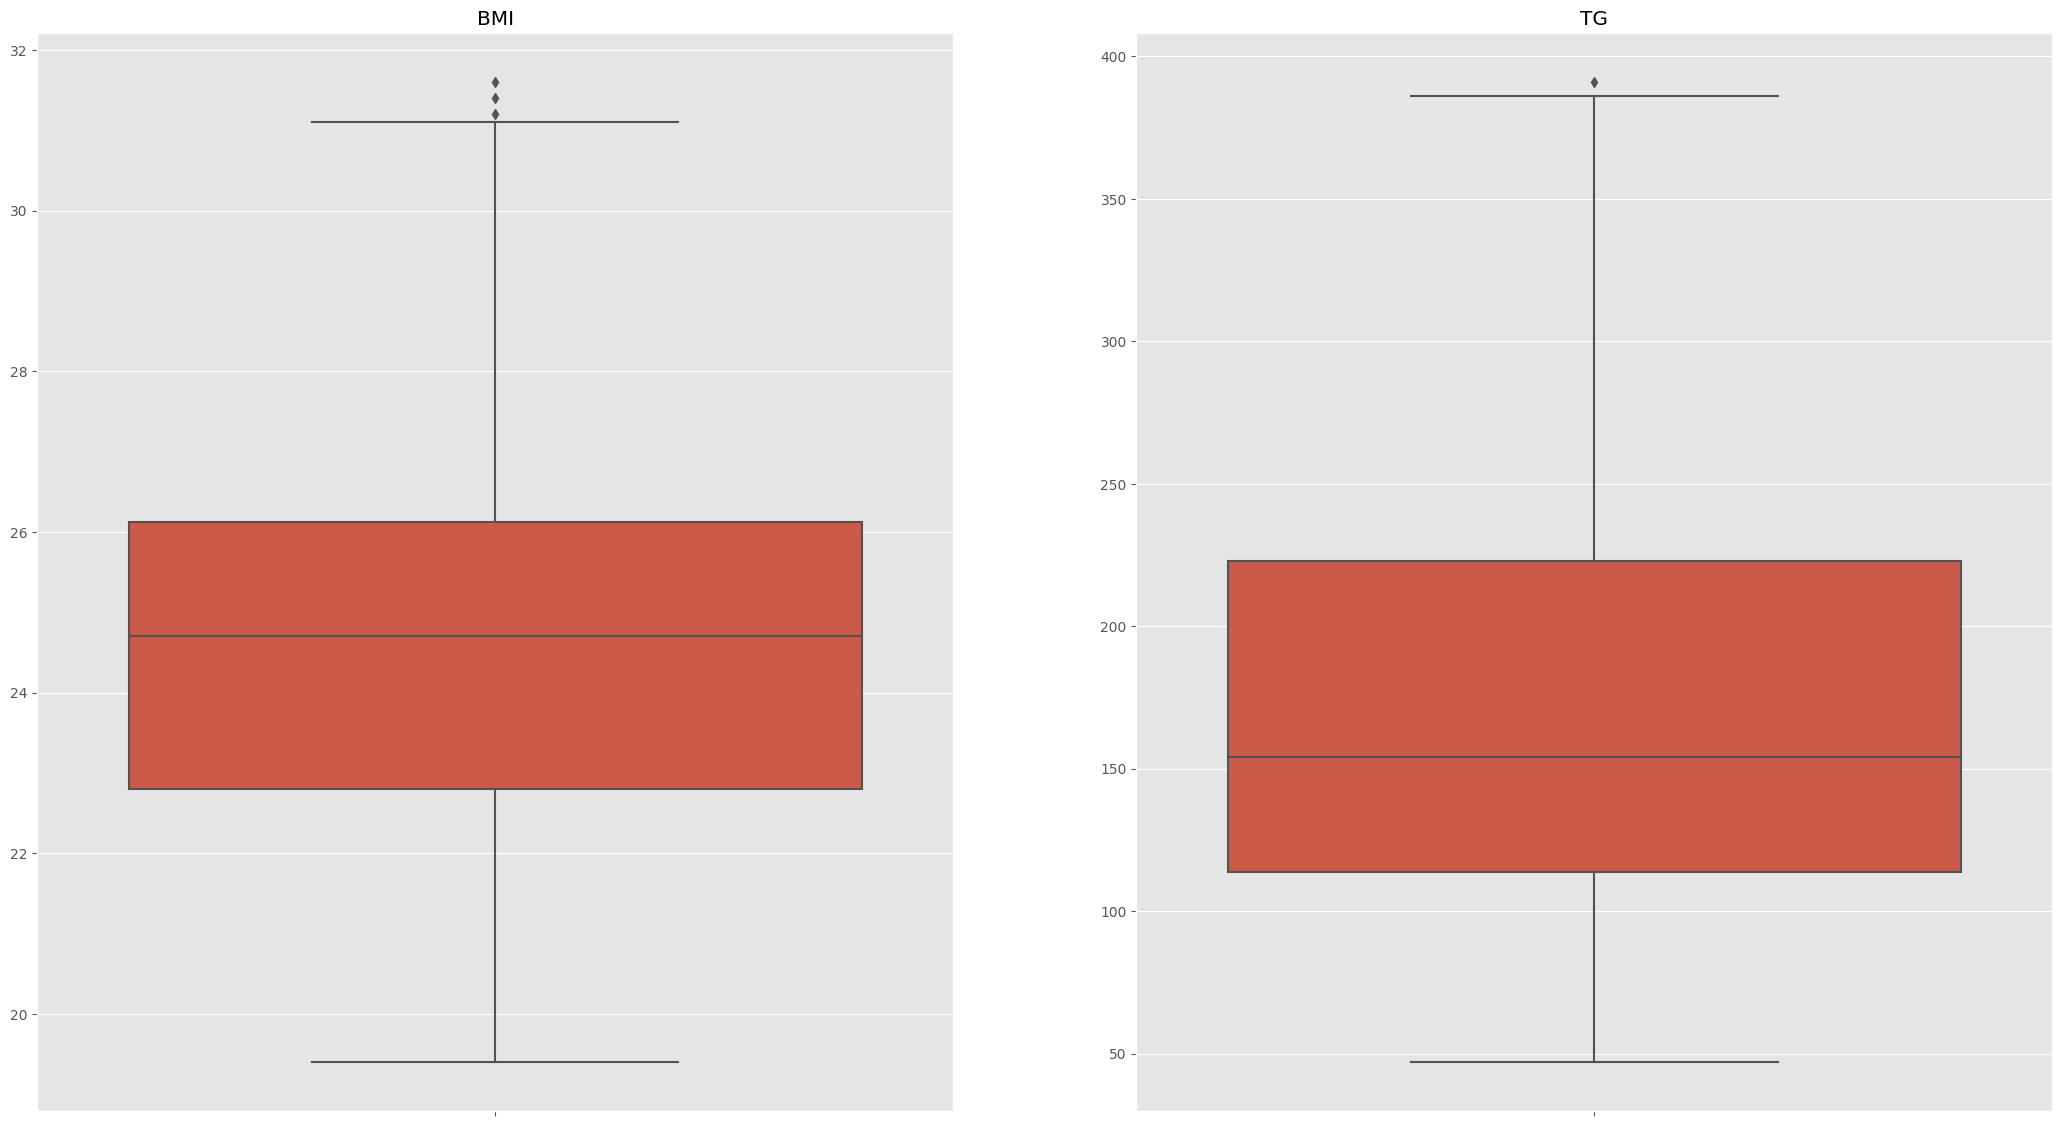

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(26, 14))
axes = axes.ravel()

for col, ax in zip(['BMI', 'TG'], axes):
  sns.boxplot(y = df[col], ax=ax)
  #sns.violinplot(y = df[col], ax=ax)
  ax.set_title(col)
  ax.set(xlabel='', ylabel='')

[0.75] Explore the relationship of features and interpret it if possible.

In [ ]:
# lets transform categorical features
df.head()

,DM,age,chol,BMI,TG,APOE,rs174548,rs4775041,HTN,chd
0,1,74,215,26.2,367,4,1,2,1,1
1,1,51,204,24.7,150,4,2,1,1,1
2,0,64,205,24.2,213,4,0,1,1,0
3,0,34,182,23.8,111,2,1,1,1,0
5,1,39,176,22.7,53,4,0,2,0,0


In [ ]:
categorical

['DM', 'APOE', 'rs174548', 'rs4775041', 'HTN', 'chd']

In [ ]:
df2 = pd.get_dummies(df, columns=categorical, drop_first = True)
df2.head(4)

,age,chol,BMI,TG,DM_1,APOE_2,APOE_3,APOE_4,APOE_5,APOE_6,rs174548_1,rs174548_2,rs4775041_1,rs4775041_2,HTN_1,chd_1
0,74,215,26.2,367,1,0,0,1,0,0,1,0,0,1,1,1
1,51,204,24.7,150,1,0,0,1,0,0,0,1,1,0,1,1
2,64,205,24.2,213,0,0,0,1,0,0,0,0,1,0,1,0
3,34,182,23.8,111,0,1,0,0,0,0,1,0,1,0,1,0


[0.15] Answer the following questions:

* Why can't categorical attributes be encoded with natural numbers?
-> if we encode categorical attributes with natural numbers it will implie a numerical relationship between the attributes (if we have a dataset of cities and Paris is coded by 10 whereas Moscow is coded by 2 it doesnt mean Paris is somehow larger than Moscow but the model can interpret it in its own way)
* Would fields like 'id' cause the model (not necessarily linear) to overfit? Why?
> Overfitting occurs when a model becomes too complex and starts to memorize the training data, including noise and irrelevant patterns, rather than learning the true underlying patterns. So its better to remove ids from trining data as it doesnt contain any valuable information (if we have ids in training data the model can consider such numbers to be relevant features and it will lead to overfitting )

### Machine Learning [5.5]

[0.35] Split the data into train/test subsets and choose your target performance measure. Explain your choice.

In [ ]:
from sklearn.model_selection import train_test_split

Y = df2.pop("chol")
Y = Y.values
X = df2.values

print("Before:")
print(f"\tX: {X.shape}; Y: {Y.shape}")


X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state = 84
)

print("Train:")
print(f"\tX: {X_train.shape}; Y: {Y_train.shape}")
print("Test:")
print(f"\tX: {X_test.shape}; Y: {Y_test.shape}")


Before:
	X: (388, 15); Y: (388,)
Train:
	X: (271, 15); Y: (271,)
Test:
	X: (117, 15); Y: (117,)


[0.15] Answer the following questions:

* Why do we need to scale the feature matrix before training machine learning models?
-> there is no inherent order or hierarchy between the different categories, so scaling is the way to avoid the domination of features with larger values and all features contribute equally to the model


* Why do you think we don't produce scaling of One Hot encoded features?
-> One-hot encoding creates binary features so scaling and One-hot encoding ensures that each category is represented as a separate feature with equal importance so wouldn't make much sense. Moreover, scaling such features will result in losing  interpretability (presence or absence of a category)

[0.35] Apply transformation to data, if needed. Justfy your choice.

In [ ]:
_vars # num cols - lets scale them as they need to be one shape in model

['age', 'BMI', 'TG']

In [ ]:
from sklearn.preprocessing import PowerTransformer

ptransform = PowerTransformer(standardize=False).fit(X_train)
print("Estimated lambda: ", ptransform.lambdas_)

X_train = ptransform.transform(X_train)
X_test = ptransform.transform(X_test)

Estimated lambda:  [ 8.90470287e-01 -2.42308811e-01  3.71913588e-02 -8.67607843e-01
 -1.21958033e+01 -1.30323454e+02  3.28791081e+00 -8.98003380e+00
 -4.34411508e+01 -2.81498559e+00 -1.77704010e+01 -9.98060611e-01
 -2.17204811e+01  6.37824890e+00 -3.62084792e+00]


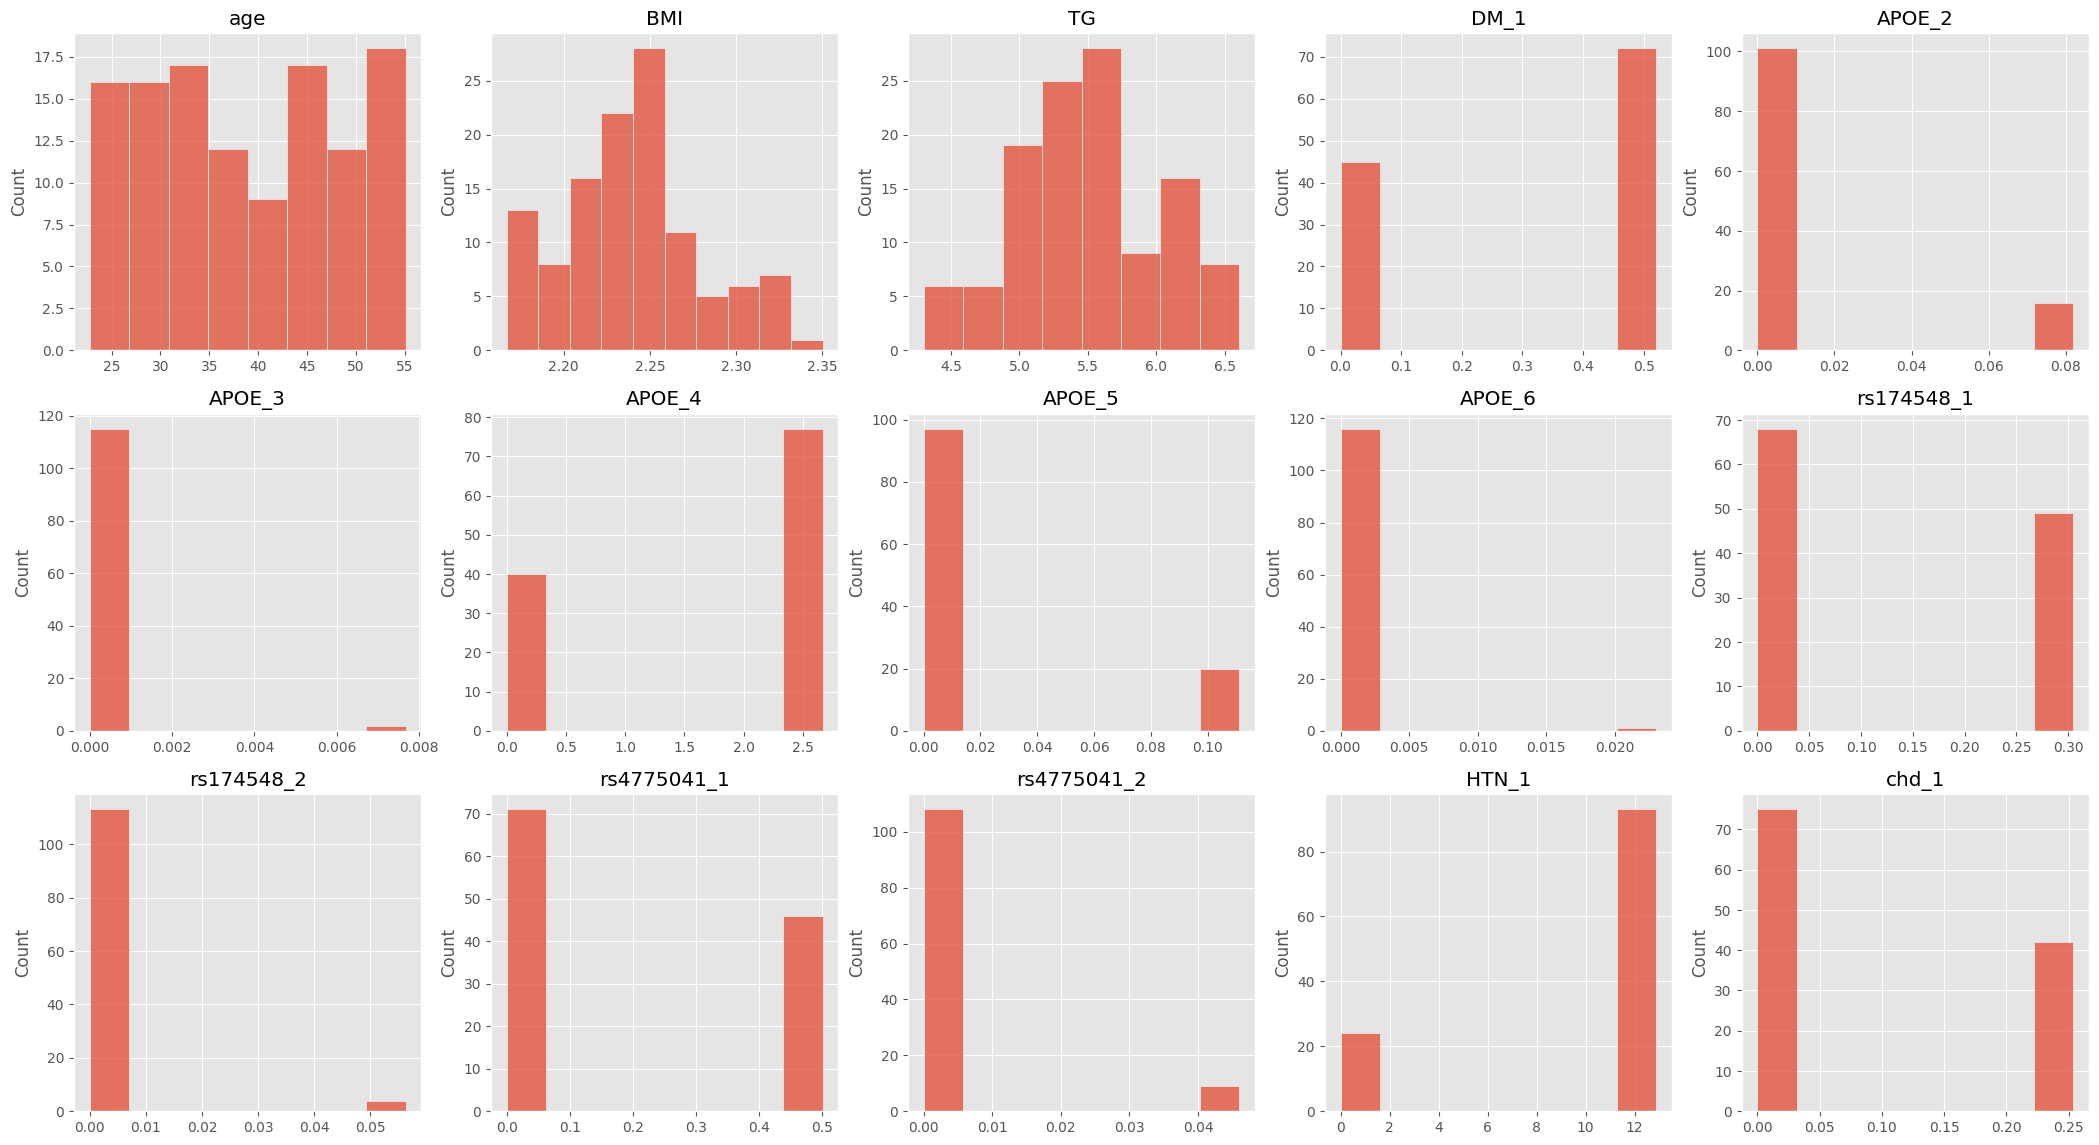

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(26, 14))
axes = axes.ravel()

X, Y = X_test, X_train
for ax, col in zip(axes, range(X.shape[1])):
  sns.histplot(x=X[:, col], ax=ax)
  ax.set_title(df2.columns[col])

[0.25] Train a simple linear regression model, and rank it using test set. How well the model is doing?

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Fit the linear regression model
lr = LinearRegression().fit(X_train, Y_train)

In [ ]:
from sklearn.metrics import r2_score
print('simple regression r^2: ', r2_score(Y_test, lr.predict(X_test))) # y_true, y_pred

simple regression r^2:  0.3839264616731768


[0.1] Answer the following question:

* From a simple linear regression model point of view, are the largest weights always the most important ones?
> No, in a simple linear regression model, the magnitude of the weights alone does not necessarily indicate the importance of the variables. A larger positive weight indicates a stronger positive relationship between the feature and the target variable; a larger negative weight indicates a stronger negative relationship.


[0.25] Obtain weights of the linear regression equation for this model and interpret them.

In [ ]:
for i in range(len(df2.columns)):
  print(list(df2.columns)[i],  f'lr.coef_ : {list(lr.coef_)[i]}')

print('--------------------')
print(f'lr.intercept_ : {lr.intercept_}')

age lr.coef_ : 0.2097251659338982
BMI lr.coef_ : 25.93927506712387
TG lr.coef_ : 3.172651120089574
DM_1 lr.coef_ : 11.068953026064355
APOE_2 lr.coef_ : -56.945558059015944
APOE_3 lr.coef_ : 1640.5381665635675
APOE_4 lr.coef_ : 2.8034660149428574
APOE_5 lr.coef_ : 130.86413006900253
APOE_6 lr.coef_ : 724.0140540566023
rs174548_1 lr.coef_ : 23.178556008275653
rs174548_2 lr.coef_ : 121.05368563329705
rs4775041_1 lr.coef_ : 2.5304414933642043
rs4775041_2 lr.coef_ : -130.29809015287444
HTN_1 lr.coef_ : -0.01456430196416747
chd_1 lr.coef_ : 61.05042199691426
--------------------
lr.intercept_ : 81.66003395878724


>we see that a great contribution to model training is made by APOE_3, APOE_6, APOE_5, rs174548_2

[0.25] What are residuals? Make a residuals vs predictions plot below. What do you observe?

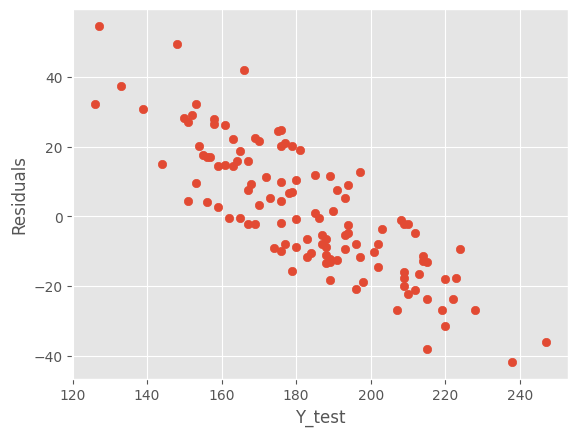

In [ ]:
Y_pred = lr.predict(X_test)
residuals = Y_pred - Y_test
plt.scatter(Y_test, residuals)

plt.xlabel("Y_test")
plt.ylabel("Residuals")
plt.show()

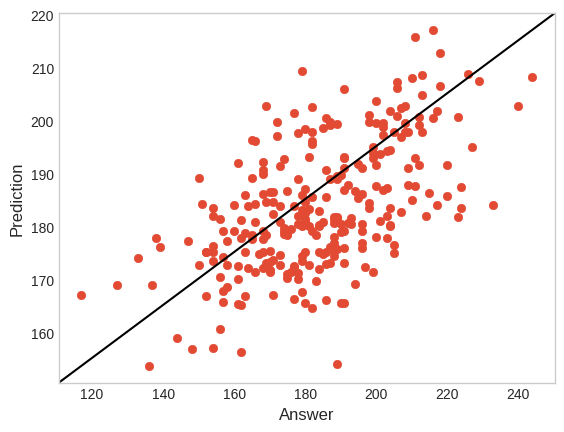

In [ ]:
plt.style.use("seaborn-v0_8-whitegrid")
# Make a scatter plot that resembles the comparison of ground-truth and predicted labels
plt.scatter(Y_train, lr.predict(X_train))
plt.grid()
plt.xlabel('Answer')
plt.ylabel('Prediction')

# Make a diagonal line, set equal limits to the size of x and y axes
ax = plt.gca()
plt.plot([0,1],[0,1], color='black', transform=ax.transAxes)
plt.show()

>we can see that our predictions aren't good - dots are all around the line and do not make pattern

[0.25] Now train the Lasso regression model. On a logarithmic scale, search for the optimal value of the regularization coefficient alpha.

firstly, lets determine alpha param

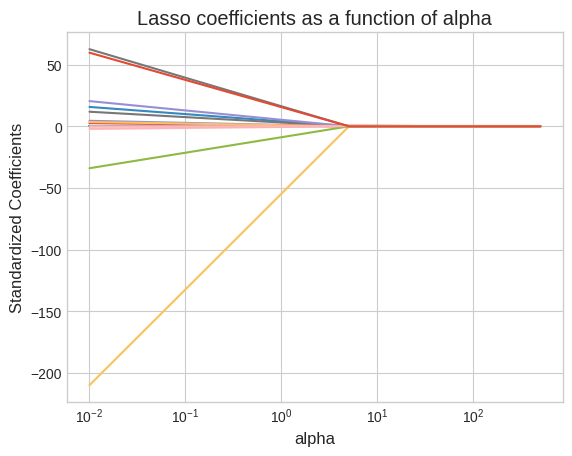

In [ ]:
# used https://www.kirenz.com/post/2019-08-12-python-lasso-regression-auto/#lasso-regression
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alphas = np.linspace(0.01, 500, 100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, Y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [ ]:
from sklearn.linear_model import LassoCV

model = LassoCV(cv=5, random_state=0, max_iter=10000)
model.fit(X_train, Y_train)
LassoCV(cv=5, max_iter=10000, random_state=0)
model.alpha_

0.04572754266108072

In [ ]:
reg = Lasso(alpha = model.alpha_).fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print('Lasso R^2: ', r2_score(Y_test, Y_pred))

Lasso R^2:  0.3500465570332535


lets compare LassoCV alpha with alpha value using logarithmic scale

In [ ]:
from sklearn.model_selection import cross_val_score

alphas = 10.**(np.arange(-4, 11))

best_alpha = None
best_score = float('-inf')

for alpha in alphas:
    model = Lasso(alpha=alpha)
    scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_alpha = alpha

best_alpha

0.01

In [ ]:
reg = Lasso(alpha = best_alpha).fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print('Lasso R^2: ', r2_score(Y_test, Y_pred))

Lasso R^2:  0.3799468465939019


with alpha we chose using log scale model score is better

[0.25] For each sampled alpha for Lasso, count the number of zero weights in the model and plot its dependence on alpha. How much will we have to lose in prediction quality if we want to get rid of at least half of the features using Lasso?

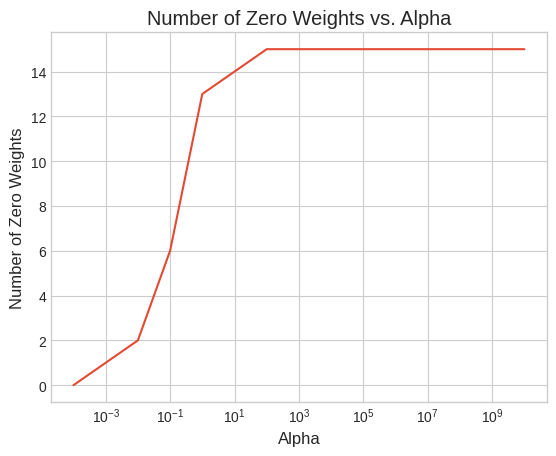

In [ ]:
zero_weights = []
for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train, Y_train)
    zero_weights.append(len([x for x in model.coef_ if x == 0]))

plt.plot(alphas, zero_weights)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Number of Zero Weights')
plt.title('Number of Zero Weights vs. Alpha')
plt.show()

In [ ]:
# lets get rid of features
reg = Lasso(alpha = 1).fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print('Lasso R^2: ', r2_score(Y_test, Y_pred))

Lasso R^2:  0.01600681148259353


the metric has deteriorated significantly

[0.5] Train and optimize hyperparameters for Elastic Net, Ridge, SVM and KNN.

ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
model = ElasticNet()
param_grid = {
    'alpha': 10.**(np.arange(-4, 101)),
    'l1_ratio': [0.25, 0.5, 0.75]
}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, Y_train)
print(f"Best Hyperparameters: {grid_search.best_params_}")

Best Hyperparameters: {'alpha': 0.0001, 'l1_ratio': 0.25}


Ridge

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge()
param_grid = {
    'alpha': 10.**(np.arange(-4, 101))
}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, Y_train)
print(f"Best Hyperparameters: {grid_search.best_params_}")

Best Hyperparameters: {'alpha': 0.01}


KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

print(f"Best Hyperparameters: {grid_search.best_params_}")

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}


SVR

In [ ]:
from sklearn.svm import SVR
model = SVR()
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf']
}

grid_search = GridSearchCV(model, param_grid, cv=5, verbose = 2)
grid_search.fit(X_train, Y_train)

print(f"Best Hyperparameters: {grid_search.best_params_}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1,

[0.25] Justify the parameters grid for each model. What number of cross-validation folds did you use? Why?


> usually cv is 5 or 10, since we initially do not expect high accuracy of the model (for ex small dataset), it makes no sense to make a lot of cv



KNeighborsRegressor showed the best results

[0.85] Use test set to rank optimized models. Describe and interpret results.

In [ ]:
from sklearn.metrics import mean_squared_error

models = {
    'Lasso' : Lasso(alpha = best_alpha).fit(X_train, Y_train),
    "Elastic Net": ElasticNet(alpha = 0.0001, l1_ratio = 0.25).fit(X_train, Y_train),
    "Ridge": Ridge(alpha = 0.01).fit(X_train, Y_train),
    "KNN": KNeighborsRegressor(metric = 'manhattan', n_neighbors = 9, weights = 'uniform').fit(X_train, Y_train),
    "SVR": SVR(C = 10, kernel = 'linear').fit(X_train, Y_train),
}

# print metrics
mse_scores = {}
r2_scores = {}

for model_name, model in models.items():
    md = model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, y_pred)
    mse_scores[model_name] = mse
    r2 = r2_score(Y_test, md.predict(X_test))
    r2_scores[model_name] = r2

print("MSE Scores:")
for model_name, mse in mse_scores.items():
    print(f"{model_name}: {mse}")
print("-----------------")
print("R2 Scores:")
for model_name, r2 in r2_scores.items():
    print(f"{model_name}: {r2}")

MSE Scores:
Lasso: 350.5397961680844
Elastic Net: 349.4894490846055
Ridge: 349.1413878870535
KNN: 537.9130526537934
SVR: 455.3255484752504
-----------------
R2 Scores:
Lasso: 0.3799468465939019
Elastic Net: 0.38180475553434556
Ridge: 0.38242042441268587
KNN: 0.04851121555295623
SVR: 0.19459631903515917


[0.85] Perform a feature importance analysis for all models (where applicable), interpret the results, and make appropriate comparisons.

In [ ]:
for model_name, model in models.items():
  if model_name != 'KNN':
    md = model.fit(X_train, Y_train)
    print(f'{model_name} : {list(md.coef_)}')

Lasso : [0.15825322744203632, 15.76159316470736, 4.487056269581304, 11.863822360052296, -210.12783220801612, -0.0, -2.10980624811956, 2.64861750973176, 0.0, 20.48413798076874, 62.62785081505672, 3.5009721980602393, -33.995336895316065, 0.033356714554133415, 59.77550763360371]
Elastic Net : [0.17445788712880814, 23.93239878360996, 3.9642746463085463, 11.357245135071175, -171.78634880462354, 1.7819742881208687, -1.1262752691508704, 32.71312374729559, 46.54865025359135, 21.858446503271047, 85.27324230548818, 3.1348569392307377, -73.99613680308126, 0.018313145808723057, 59.877789886838656]
Ridge : [0.18520625527212722, 25.264571710828132, 3.665422722700164, 11.203292997079938, -190.41017429468042, 2.1313911329316957, -1.5119291205808347, 25.40682819569432, 67.8637579087403, 22.49062760638459, 100.47050108030759, 2.996492943607716, -94.32603101859225, 0.0058349661221665195, 60.08123685784311]
SVR : [array([  0.3615367 ,   3.62737319,   5.63921293,   9.77166105,
       -14.75602934,  -0.0767

In [ ]:
list(df2.columns)

['age',
 'BMI',
 'TG',
 'DM_1',
 'APOE_2',
 'APOE_3',
 'APOE_4',
 'APOE_5',
 'APOE_6',
 'rs174548_1',
 'rs174548_2',
 'rs4775041_1',
 'rs4775041_2',
 'HTN_1',
 'chd_1']

[0.85] Answer the following questions:

* Which model works the best with cholesterol data? Explain, what could be the reason for it.
-> KNN model (KNeighborsRegressor) appeared to be the best. Probably KNN is good for small datasets
* Based on your analysis above, have you found expected/unexpected important features? Is the connection with cholesterol level seems logical?
-> I excpected higher correlation of BMI with cholesterol level, others features impact was expected
* Would you suggest to use that model to a doctor or use it in a real study?
-> No.  firstly, a small dataset, secondly, poor quality of models (low metrics), thirdly, data with outliers and correlation

# Extra points [2.0]

[0.5 + 1.0] Implement stochastic gradient descent for linear regression from scrath. Make it in a form of python function!

[0.5] If you make it as simple as the one-feature model we looked at in the class, [1.0] for implementation that works with whole cholesterol dataset.

In [ ]:
def stochasticGradientDescent(X, y, learning_rate=0.01, num_epochs=100):
    num_samples, num_features = X.shape
    w = np.zeros(num_features)
    b = 0

    for epoch in range(num_epochs):
        for i in range(num_samples):
            random_index = np.random.randint(num_samples)
            x = X[random_index]
            target = y[random_index]
            prediction = np.dot(x, w) + b
            error = prediction - target
            w -= learning_rate * error * x
            b -= learning_rate * error

    return w, b

[0.5] Use any implementation of SGD to calculate MSE at each step. Make a plot that represents how MSE changes with each step. What learning rate and batch size works best for you?

In [ ]:
# YOUR CODE HERE ᕦ(ò_óˇ)ᕤ